# Assignment

# Naive Bayes Classification

## 1. 직접 수식을 작성하여 Naive Bayes 모델을 만들겠습니다.
- 주어진 dataset 을 확인해 보기위해 엑셀 파일을 읽습니다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
documents = pd.read_excel('./test_file.xlsx') 
documents 

,label,message
0,comedy,"Fun couple, love love"
1,action,"fast Furious, shoot!!"
2,comedy,"couple^^, fly, fast, fun, fun"
3,action,"furious, shoot shoot fun"
4,action,"fly~~ fast shoot, Love"


### step 1. 단어를 모두 소문자로 바꾸어 줍니다. 

In [3]:
# 소문자로 바꾸기 : lower 함수 이용

lower_documents = [x.lower() for x in list(documents.message)]     

print(lower_documents)

['fun couple, love love', 'fast furious, shoot!!', 'couple^^, fly, fast, fun, fun', 'furious, shoot shoot fun', 'fly~~ fast shoot, love']


### step2. string.punctuation 을 이용해서 특수문자를 제거해주세요.
- string.punctuation 에는 특수문자들이 저장되어있는 것을 확인할 수 있습니다.

In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
import re

# re.sub(pattern, repl, string, count=0, flags=0) 이용
# 위에서 확인한 string.punctuation을 pattern parameter에 대입

del_punctuation_documents = []

for string in lower_documents:
    new_string = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', string)
    del_punctuation_documents.append(new_string)
    
print(del_punctuation_documents)

['fun couple love love', 'fast furious shoot', 'couple fly fast fun fun', 'furious shoot shoot fun', 'fly fast shoot love']


### step 3. 단어를 하나씩 띄어쓰기 단위로 쪼개어 줍니다.

In [6]:
preprocessed_documents = []

for string in del_punctuation_documents:
    preprocessed_documents.append(string.split())     # split 함수 이용 - 문자열을 띄어쓰기 단위로 나눈 결과를 리스트에 저장 
    
preprocessed_documents

[['fun', 'couple', 'love', 'love'],
 ['fast', 'furious', 'shoot'],
 ['couple', 'fly', 'fast', 'fun', 'fun'],
 ['furious', 'shoot', 'shoot', 'fun'],
 ['fly', 'fast', 'shoot', 'love']]

### step 4. 문자를 숫자로 변환해줍니다.
- 이를 위해 CountVectorizer를 사용합니다.
- CountVectorizer는 문서 집합에서 단어 토큰을 생성하고, 각 단어 수를 세어 BOW (Bag of Words) 인코딩한 벡터를 만들어줍니다.

- 문서에 해당단어가 몇번 포함되었는지를 나타낼 때 사용하는 방법입니다.

- 참고 : https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/

![CountVectorized](https://user-images.githubusercontent.com/68625698/106378540-15d8ed80-63e9-11eb-8604-5c960c274867.PNG)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(documents['message'])

CountVectorizer()

In [8]:
doc_array = count_vector.transform(documents['message']).toarray()
doc_array

array([[1, 0, 0, 1, 0, 2, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 2, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 2],
       [0, 1, 1, 0, 0, 1, 1]], dtype=int64)

In [9]:
count_vector.get_feature_names()

['couple', 'fast', 'fly', 'fun', 'furious', 'love', 'shoot']

In [10]:
# doc_array 배열에 순서에 따라 매치되는 단어를 나타낸다.

count_vector.vocabulary_

{'fun': 3,
 'couple': 0,
 'love': 5,
 'fast': 1,
 'furious': 4,
 'shoot': 6,
 'fly': 2}

In [11]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,couple,fast,fly,fun,furious,love,shoot
0,1,0,0,1,0,2,0
1,0,1,0,0,1,0,1
2,1,1,1,2,0,0,0
3,0,0,0,1,1,0,2
4,0,1,1,0,0,1,1


In [12]:
frequency_matrix['count'] = frequency_matrix.sum(axis=1)     # count column : 행별(axis = 1) Sum
frequency_matrix

,couple,fast,fly,fun,furious,love,shoot,count
0,1,0,0,1,0,2,0,4
1,0,1,0,0,1,0,1,3
2,1,1,1,2,0,0,0,5
3,0,0,0,1,1,0,2,4
4,0,1,1,0,0,1,1,4


### step 5. 범주형 변수를 dummy변수로 변환해주는 작업(One-Hot Encoding!)을 해주어야합니다.
- label 을 comedy =1, action =0 으로 변환해주세요

In [13]:
# documents의 label column을 One-Hot-Encoding : get_dummies 함수 이용

pd.get_dummies(documents["label"])

,action,comedy
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [14]:
documents["label"] = pd.get_dummies(documents["label"]).comedy     # One-Hot-Encoding에서 comedy column 추출 (comedy가 1이어야 하므로)

In [15]:
# documents['label'], frequency_matrix 결합

doc = pd.concat([documents['label'],frequency_matrix],axis=1)

In [16]:
doc

,label,couple,fast,fly,fun,furious,love,shoot,count
0,1,1,0,0,1,0,2,0,4
1,0,0,1,0,0,1,0,1,3
2,1,1,1,1,2,0,0,0,5
3,0,0,0,0,1,1,0,2,4
4,0,0,1,1,0,0,1,1,4


###  step 6. 나이브 베이즈 계산을 해봅시다!

- 입력문서가 {fast, fly, shoot} 을 주요 단어로 가질때, 이 문서는 얼마의 확률로 어떤 문서로 분류가 될까요? (계산과정을 채워주세요) 

In [17]:
doc =  np.array(doc)          # dataframe을 np-array로 변환해줍니다.
                         # return값은 np-matrix가 아니라 np-array입니다.
doc

array([[1, 1, 0, 0, 1, 0, 2, 0, 4],
       [0, 0, 1, 0, 0, 1, 0, 1, 3],
       [1, 1, 1, 1, 2, 0, 0, 0, 5],
       [0, 0, 0, 0, 1, 1, 0, 2, 4],
       [0, 0, 1, 1, 0, 0, 1, 1, 4]], dtype=int64)

In [18]:
type(doc)

numpy.ndarray

####  P(Y=comedy), P(Y=action) 계산하기

In [19]:
# P(Y=comedy)

p_comedy = sum(doc[:, 0]) / len(doc[:, 0])     # doc[:, 0] : array의 0열(1번째 열). 즉, doc의 label column에 대응

# P(Y=action)

p_action = 1 - p_comedy     # 장르가 comedy, action 두 종류이므로 p_comedy + p_action = 1을 만족해야 한다.

In [20]:
print('p_comedy : ',p_comedy)
print('p_action : ', p_action)

p_comedy :  0.4
p_action :  0.6


#### P(fast=1|comedy=1), P(fly=1|comedy=1), P(shoot=1|comedy=1) 계산하기
* 참고 : 문서에 두 번 등장한 단어 주의

* 조건부 확률 계산
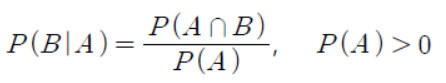

* **조건부 확률의 분모**
* `doc`의 `count` column : doc array의 8열
    * sum(doc[doc[:, 0] == 1][:, 8]) : 장르가 comedy에 속하는 전체 단어 개수


* **조건부 확률의 분자**
* `doc`의 `fast` column : array의 2열
    * sum(doc[doc[:, 0] == 1][:, 2]) : 장르가 comedy인 fast의 개수
* `doc`의 `fly` column : array의 3열
    * sum(doc[doc[:, 0] == 1][:, 3]) : 장르가 comedy인 fly의 개수
* `doc`의 `shoot` column : array의 7열
    * sum(doc[doc[:, 0] == 1][:, 7]) : 장르가 comedy인 shoot의 개수

In [21]:
doc[doc[:, 0] == 1]     # comedy 행만 추출 (comedy = 1로 변환했으므로)

array([[1, 1, 0, 0, 1, 0, 2, 0, 4],
       [1, 1, 1, 1, 2, 0, 0, 0, 5]], dtype=int64)

In [22]:
# P(fast=1|comedy=1) = P(fast)

p_comedy_fast = sum(doc[doc[:, 0] == 1][:, 2]) / sum(doc[doc[:, 0] == 1][:, 8])

# P(fly=1|comedy=1)

p_comedy_fly = sum(doc[doc[:, 0] == 1][:, 3]) / sum(doc[doc[:, 0] == 1][:, 8])

# P(shoot=1|comedy=1)

p_comedy_shoot = sum(doc[doc[:, 0] == 1][:, 7]) / sum(doc[doc[:, 0] == 1][:, 8])

In [23]:
print('p_comedy_fast : ' , p_comedy_fast)
print('p_comedy_fly : ' , p_comedy_fly)
print('p_comedy_shoot : ' , p_comedy_shoot)   

p_comedy_fast :  0.1111111111111111
p_comedy_fly :  0.1111111111111111
p_comedy_shoot :  0.0


#### P(fast=1|action=1), P(fly=1|action=1), P(shoot=1|action=1) 계산하기
* 참고 : 문서에 두번 등장한 단어 주의

* **조건부 확률의 분모**
* `doc`의 `count` column : doc array의 8열
    * sum(doc[doc[:, 0] == 0][:, 8]) : 장르가 action에 속하는 전체 단어 개수


* **조건부 확률의 분자**
* `doc`의 `fast` column : array의 2열
    * sum(doc[doc[:, 0] == 0][:, 2]) : 장르가 action인 fast의 개수
* `doc`의 `fly` column : array의 3열
    * sum(doc[doc[:, 0] == 0][:, 3]) : 장르가 action인 fly의 개수
* `doc`의 `shoot` column : array의 7열
    * sum(doc[doc[:, 0] == 0][:, 7]) : 장르가 action인 shoot의 개수

In [24]:
doc[doc[:, 0] == 0]     # action 행만 추출 (action = 0으로 변환했으므로)

array([[0, 0, 1, 0, 0, 1, 0, 1, 3],
       [0, 0, 0, 0, 1, 1, 0, 2, 4],
       [0, 0, 1, 1, 0, 0, 1, 1, 4]], dtype=int64)

In [25]:
# P(fast=1|action=1)

p_action_fast = sum(doc[doc[:, 0] == 0][:, 2]) / sum(doc[doc[:, 0] == 0][:, 8])

# P(fly=1|action=1)

p_action_fly = sum(doc[doc[:, 0] == 0][:, 3]) / sum(doc[doc[:, 0] == 0][:, 8])

# P(shoot=1|action=1)

p_action_shoot = sum(doc[doc[:, 0] == 0][:, 7]) / sum(doc[doc[:, 0] == 0][:, 8])

In [26]:
print('p_action_fast : ' , p_action_fast)
print('p_action_fly : ' , p_action_fly)
print('p_action_shoot : ' , p_action_shoot)  

p_action_fast :  0.18181818181818182
p_action_fly :  0.09090909090909091
p_action_shoot :  0.36363636363636365


#### P(Y = comedy| X = fast, fly, shoot) , P(Y = action=1| X = fast, fly, shoot) 값 계산하기

In [27]:
# P(Y = comedy| X = fast, fly, shoot)

proba_comedy = p_comedy * p_comedy_fast * p_comedy_fly * p_comedy_shoot

# P(Y = action| X = fast, fly, shoot)

proba_action = p_action * p_action_fast * p_action_fly * p_action_shoot

In [28]:
print('proba_comedy', proba_comedy)
print('proba_action', proba_action)

proba_comedy 0.0
proba_action 0.003606311044327574


### step 7. 라플라스 스무딩
1. P(Y = comedy| X = fast, fly, shoot) => 0
2. P(Y = action| X = fast, fly, shoot) => 0.003606311044327574

- proba_comedy를 보면 p_comedy_shoot의 값인 0으로 인해 확률이 0으로 계산되었다는 것을 확인할 수 있습니다. 이 문제점을 해결해주세요.

* 해결방법 : **라플라스 스무딩 기법**
    * **라플라스 스무딩** : 학습 데이터에 없던 값 or 이상치가 들어와서 확률이 0이 되었을 때 해당 확률을 보정하는 방법
    * 즉, 확률이 0인 경우를 제외시킴. (실제로 관찰한 것보다 한 번씩 더 봤다고 가정)

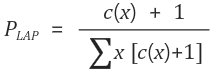

In [29]:
frequency_matrix

,couple,fast,fly,fun,furious,love,shoot,count
0,1,0,0,1,0,2,0,4
1,0,1,0,0,1,0,1,3
2,1,1,1,2,0,0,0,5
3,0,0,0,1,1,0,2,4
4,0,1,1,0,0,1,1,4


* 아래 각 확률의 계산 방법 자체는 2.1.6.2, 2.1.6.3에서의 계산 원리와 동일하다. 기존의 분자, 분모를 각각 어떻게 보정해야 하는지 알아보자.
    * [분자] 라플라스 스무딩 기법으로 계산되는 확률의 분자는 기존 분자에 1을 더한 값이다.
    * [분모] `frequency_matrix`를 다시 확인해보니, 입력변수의 개수는 7개다. (`count` column은 행별 합을 보여주도록 새롭게 생성된 column으로, 입력변수 개수에 포함되지 않는다.) 따라서 라플라스 스무딩 기법으로 계산되는 확률의 분모는 기존 분모에 7을 더한 값이다.

In [30]:
v = 7     # 입력변수 개수를 저장하는 변수 v 선언

In [31]:
# P(fast=1|comedy=1)

p_comedy_fast_L = (sum(doc[doc[:, 0] == 1][:, 2]) + 1) / (sum(doc[doc[:, 0] == 1][:, 8]) + v)

# P(fly=1|comedy=1)

p_comedy_fly_L = (sum(doc[doc[:, 0] == 1][:, 3]) + 1) / (sum(doc[doc[:, 0] == 1][:, 8]) + v)

# P(shoot=1|comedy=1)

p_comedy_shoot_L = (sum(doc[doc[:, 0] == 1][:, 7]) + 1) / (sum(doc[doc[:, 0] == 1][:, 8]) + v)

In [32]:
print('p_comedy_fast_L : ' , p_comedy_fast_L)
print('p_comedy_fly_L : ' , p_comedy_fly_L)
print('p_comedy_shoot_L : ' , p_comedy_shoot_L)

p_comedy_fast_L :  0.125
p_comedy_fly_L :  0.125
p_comedy_shoot_L :  0.0625


In [33]:
# P(fast=1|action=1)

p_action_fast_L = (sum(doc[doc[:, 0] == 0][:, 2]) + 1) / (sum(doc[doc[:, 0] == 0][:, 8]) + v)

# P(fly=1|action=1)

p_action_fly_L = (sum(doc[doc[:, 0] == 0][:, 3]) + 1) / (sum(doc[doc[:, 0] == 0][:, 8]) + v)

# P(shoot=1|action=1)

p_action_shoot_L = (sum(doc[doc[:, 0] == 0][:, 7]) + 1) / (sum(doc[doc[:, 0] == 0][:, 8]) + v)

In [34]:
print('p_action_fast_L : ' , p_action_fast_L)
print('p_action_fly_L : ' , p_action_fly_L)
print('p_action_shoot_L : ' , p_action_shoot_L)

p_action_fast_L :  0.16666666666666666
p_action_fly_L :  0.1111111111111111
p_action_shoot_L :  0.2777777777777778


In [35]:
# P(Y = comedy| X = fast, fly, shoot)

proba_comedy_L = p_comedy * p_comedy_fast_L * p_comedy_fly_L * p_comedy_shoot_L

# P(Y = action| X = fast, fly, shoot)

proba_action_L = p_action * p_action_fast_L * p_action_fly_L * p_action_shoot_L

In [36]:
print('proba_comedy_L : ', proba_comedy_L)
print('proba_action_L : ', proba_action_L)

proba_comedy_L :  0.000390625
proba_action_L :  0.0030864197530864196


### => 두개의 값을 비교하면 action 장르일 때 fast, fly, shoot 단어가 더 자주 나온다고 할 수 있다.

## 2. sklearn을 활용한 Naive Bayes Model
- 수업 시간에 활용했던 날씨와 온도 데이터를 활용하겠습니다.

In [37]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [38]:
df = pd.DataFrame({'weather':weather, 'temperature':temp, 'play':play})
df     # DataFrame 변수 선언

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


### step 1. 문자를 Label Encoding 해줍니다.

In [39]:
from sklearn.preprocessing import LabelEncoder

encoded_list = []     # encoded_list : Column별 Label Encoding의 결과를 담을 리스트

# for loop를 이용해 df의 column별로 Label Encoding 진행 및 결과 저장

for col in df.columns:
    encoder = LabelEncoder()
    encoder.fit(df[col].unique())
    encoded_list.append(encoder.transform(df[col]))

weather_encoded = encoded_list[0]     # weather_encoded : weather column에 대한 Label Encoding 결과
temp_encoded = encoded_list[1]     # temp_encoded : temperature column에 대한 Label Encoding 결과
label = encoded_list[2]     # label : play column(target)에 대한 Label Encoding 결과

print("weather:", weather_encoded)
print("Temp:", temp_encoded)
print("Play:", label)

weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [40]:
features = list(zip(weather_encoded,temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


### step 2. sklearn의 Naive Bayes 모델인 MultinomialNB를 사용하여 예측하겠습니다.
* weather = 0(Overcast), temperature = 2(Mild)인 경우 play = Yes일 것으로 예측!

In [41]:
from sklearn.naive_bayes import MultinomialNB

# 라플라스 스무딩(alpha = 1)

model = MultinomialNB(alpha=1)

# Train the model using the training sets

model.fit(features,label)

# Predict Output

predicted = model.predict([[0,2]])     # 0 : Overcast, 2 : Mild
print("Predicted Value:", predicted)     # 1 : Yes

Predicted Value: [1]


### sklearn의 와인 데이터를 바탕으로 MultinomialNB를 활용하여 예측해주세요!
- train과 test 비율은 8:2로 해주세요.
- metrics는 accuracy로 진행해주세요.

In [42]:
from sklearn import datasets

# Load dataset

wine = datasets.load_wine()

# print the names of the 13 features

print("Features: ", wine.feature_names)

# print the label type of wine (class_0, class_1, class_2)

print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [43]:
data = pd.concat([pd.DataFrame({'Labels':wine.target}), pd.DataFrame(wine.data, columns = wine.feature_names)], axis=1)
data     # DataFrame 변수 선언

,Labels,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [44]:
from sklearn.model_selection import train_test_split

X = data.drop(['Labels'], axis = 1)
y = data.Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, train_size = 0.2, random_state = 1)   
# random_state 설정해서 shuffling 제어

In [45]:
from sklearn.naive_bayes import MultinomialNB
# sklearn.naive_bayes.MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)     # Train Data로 모델(classifier) 학습시키기

MultinomialNB()

In [46]:
from sklearn.metrics import accuracy_score

score = classifier.score(X_test, y_test)     # Test Data를 넣고, accuracy를 기준으로 모델 성능 확인하기

print("Accuracy:", score)

Accuracy: 0.8181818181818182


### 끝!